# 지도학습 _분류분석_컬럼선택법_클래스불균형_모델성능향상 시키기


# 중요 컬럼 선택하기-3가지 방법
**컬럼을 어떻게 선택하느냐에따라 모델성능이 달라짐**
1. EDA를 통해 종속변수와 중요한 관계인 변수들만 선택
2. 수치형 변수는 상관분석 결과를 통해, 범주형 변수는 카이제곱 통계량(통계학적 방법) 이용하여 체크후 중복제거하는 방법.
3. 머신러닝 알고리즘을 통한 1차 분석 후 중요하게 사용된 변수만 선택 (시간이 없을경우 1번보다 유용)

# tree 계열 모델의 feature_importance로 선택
- 트리계열 모델 중 내부에 feature_importance를 출력할 수 있는 모델이 있음
- 어떤 질문을 던졌을때 분류가 잘됐는지와 같은 정보
- tree계열은 질문에 대한 답을 내부에 저장하여서 모델내부에 결론이 이미 나있고, 질문을 마친후 다시

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [2]:
# 모델 학습
from sklearn.model_selection import train_test_split
# 결정나무
from sklearn.tree import DecisionTreeClassifier
# 평가 지표
from sklearn.metrics import accuracy_score,classification_report

In [4]:
data0 = pd.read_csv("./data/salary2.csv")
data0.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
data= data0.copy()

# RandomForest

In [7]:
data=data.drop_duplicates()

In [8]:
data=data.dropna()

In [9]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [10]:
# 인덱스가 중구난방???? 
data=data.reset_index(drop=True)
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39235,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
39236,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
39237,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
39238,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [11]:
# 카테고리컬럼을 숫자로 바꾸기
# 이후 겟더미 이후 모델에 바로넣기
data['class'] # 찍어보기

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
39235      >50K
39236     <=50K
39237     <=50K
39238     <=50K
39239      >50K
Name: class, Length: 39240, dtype: object

In [12]:
# 람다로 50K초과인 값들만 1로 바꾸기
data['class'].apply(lambda x:1 if x==' >50K' else 0)

0        0
1        0
2        1
3        1
4        0
        ..
39235    1
39236    0
39237    0
39238    0
39239    1
Name: class, Length: 39240, dtype: int64

In [13]:
# 재할당
data['class']=data['class'].apply(lambda x:1 if x==' >50K' else 0)
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39235,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
39236,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
39237,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
39238,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [14]:
# 0,1 된점 확인후 
# 더미변수들 만들기
pd.get_dummies(data, drop_first=True)

,age,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,25,7,0,0,40,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,50,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,40,1,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,40,1,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,34,6,0,0,30,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39235,53,14,0,0,40,1,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
39236,22,10,0,0,40,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
39237,27,12,0,0,38,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
39238,58,9,0,0,40,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [15]:
# 재할당
data=pd.get_dummies(data, drop_first=True)

In [18]:
# X,y분리
X = data.drop('class',axis=1)
y = data['class']
y # 확인

0        0
1        0
2        1
3        1
4        0
        ..
39235    1
39236    0
39237    0
39238    0
39239    1
Name: class, Length: 39240, dtype: int64

In [ ]:
# 모델에 넣기
from sklearn.model_selection import train_test_split

In [19]:
y.value_counts()

class
0    29265
1     9975
Name: count, dtype: int64

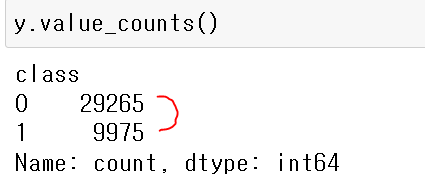
0과 1은 3:1 정도되는 상황에서 
train_test_split을 이용할때 주의할 점 stratify를 정해주지 않는 경우에는 데이터셋의 비율이 3:1보다 더벌어질 수 있음(일정하게 유지될 수 있게 y를 stratify에 넣어줘야함) <br> 하나도 안들어갈수도있기때문에 타겟변수인y를 넣어야함.

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.4, stratify=y, random_state=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn,metrics import classification_report

In [21]:
dtc= DecisionTreeClassifier(random_state=10)
dtc.fit(X_train, y_train)
pred=dtc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     11706
           1       0.61      0.60      0.60      3990

    accuracy                           0.80     15696
   macro avg       0.74      0.73      0.73     15696
weighted avg       0.80      0.80      0.80     15696



In [22]:
# max_depth 추가하기
dtc= DecisionTreeClassifier(max_depth=9,random_state=10)
dtc.fit(X_train, y_train)
pred=dtc.predict(X_test)
print(classification_report(y_test,pred))

# feature importance 출력은 아래

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11706
           1       0.77      0.58      0.66      3990

    accuracy                           0.85     15696
   macro avg       0.82      0.76      0.78     15696
weighted avg       0.84      0.85      0.84     15696



dtc가 최종모델이라는 가정하에
# feature_importance 출력하기
```만든모델명.feature_importances_```<br>
numpyarray 형태로 출력되므로<br>
```pd.DataFrame()```<br> 
```pd.DataFrame(dtc.feature_names_in_)```
현재 예제로는 row가 95개며 중요한 순서대로 컬럼명이 나옴

In [ ]:
dtc.feature_importances_

In [ ]:
pd.DataFrame(dtc.feature_importances_)

In [23]:
pd.DataFrame(dtc.feature_names_in_)

,0
0,age
1,education-num
2,capital-gain
3,capital-loss
4,hours-per-week
...,...
90,native-country_ Thailand
91,native-country_ Trinadad&Tobago
92,native-country_ United-States
93,native-country_ Vietnam


In [27]:
# 담기
importance= pd.DataFrame(dtc.feature_importances_)

In [28]:
# 담기
cols= pd.DataFrame(dtc.feature_names_in_)

In [29]:
pd.concat([cols, importance], axis=1)

,0,0
0,age,0.038730
1,education-num,0.194695
2,capital-gain,0.216183
3,capital-loss,0.078845
4,hours-per-week,0.031110
...,...,...
90,native-country_ Thailand,0.000000
91,native-country_ Trinadad&Tobago,0.000000
92,native-country_ United-States,0.000000
93,native-country_ Vietnam,0.000000


In [30]:
# 담기
important_cols= pd.concat([cols, importance], axis=1)

In [31]:
# 컬럼명 바꾸기
important_cols.columns=['column','importance']
important_cols

,column,importance
0,age,0.038730
1,education-num,0.194695
2,capital-gain,0.216183
3,capital-loss,0.078845
4,hours-per-week,0.031110
...,...,...
90,native-country_ Thailand,0.000000
91,native-country_ Trinadad&Tobago,0.000000
92,native-country_ United-States,0.000000
93,native-country_ Vietnam,0.000000


In [32]:
# 중요한 순서로 정렬
important_cols.sort_values(by='importance',ascending=False)

,column,importance
27,marital-status_ Married-civ-spouse,0.400573
2,capital-gain,0.216183
1,education-num,0.194695
3,capital-loss,0.078845
0,age,0.038730
...,...,...
90,native-country_ Thailand,0.000000
91,native-country_ Trinadad&Tobago,0.000000
92,native-country_ United-States,0.000000
93,native-country_ Vietnam,0.000000


- 연봉 데이터는 '>50K'가 1, <=50K가 

# 데이터를 증폭/축소하여 class 불균형해소
- imbalanced-learn smote/cluster-centroids
- 머신러닝 알고리즘을 통해 비슷한 데이터를 물리적으로 생성/축소
- **반드시 train 데이터에만 적용** <br> 가상으로 생성하여서 증폭시키는 값이므로
- 알고리즘에 따라 증폭 방법이 달라짐.
    - smote) 비계층형 군집분석 기반.
    - cluster-centroids ) 거리기반 계층형 군집분석 기반
    - smotenc ) 범주형과 수치형 함께.

# 데이터분석 과정 재정리
1) 데이터 선택 및 로딩
2) 결측값, 이상값 탐지
3) EDA(탐색적 데이터 분석)
4) 변수 데이터타임, 서열변수, 카테고리 변수 처리
5) 변수 선택, 파생변수 생성
6) 홀드아웃(훈련데이터, 테스트 데이터로 분리)
7) 분석에 맞는 알고리즘 불러와 모델 생성
8) 분석 목적에 맞는 지표를 통해 모델성능검증
9) 하이퍼파라미터튜닝 (클래스 불균형 해소)<br> 모델에서 소수클래스 가중치 조절
10) 최종 모델 선택
<br>
**위 과정은 공통적이되, 알고리즘이 달라질것**